# Supervised Learning Algorithm Comparison Exercise
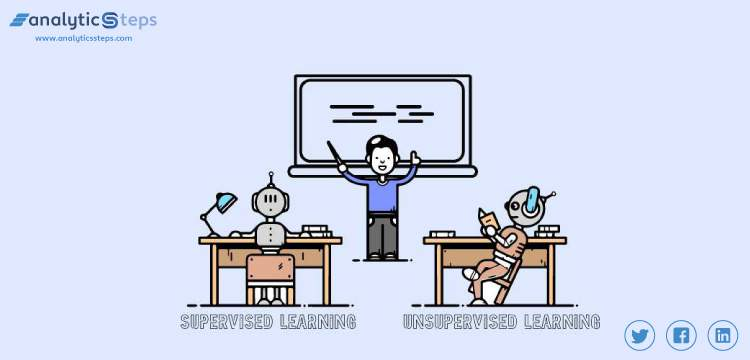

LR: 0.945121 (0.031251)
LDA: 0.947343 (0.036698)
KNN: 0.916570 (0.041193)
CART: 0.936280 (0.015331)
NB: 0.936377 (0.042049)
SVM: 0.626329 (0.004106)


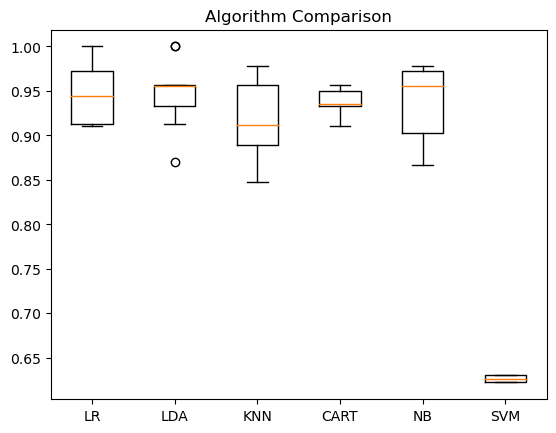

In [6]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

breast_cancer_data = datasets.load_breast_cancer()
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 1. We've already done labs covering KNN and CART (decision tree). In a few sentences, explain each of the other algorithms above (LR, LDA, NB, SVM).

Logistic Regression estimates the probability of an event occurence  based on a dataset of independent variables. Used when the target categorical.

Linear Discriminant Analysis  separates two or more classes or events. Classifies based on closest class mean.

Gaussian Naive Bayes is based on the probabilistic approach and Gaussian distribution. Assumes each parameter has an independent capacity of predicting the output variable.

Support Vector Machines uses classification algorithms for two-group classification problems. Creates a line that splits data apart.

#### 2. Rerun supervised learning comparison.

Find another dataset for which we could compare supervised learning techniques. Remember that the dataset must have a single output for which we want to train and build a model. For example, given a bunch of input parameters, would a person likely be granted a loan.

Next, implement the algorithms above for your chosen dataset. Try a few different variants of some of the algorithms. For example, in the kNN algorithm, you could specify a maximum depth. 


LR: 0.762295 (0.046575)
LDA: 0.765627 (0.060664)
KNN: 0.714754 (0.057797)
CART: 0.671259 (0.039621)
NB: 0.763882 (0.036419)
SVM: 0.653120 (0.005458)


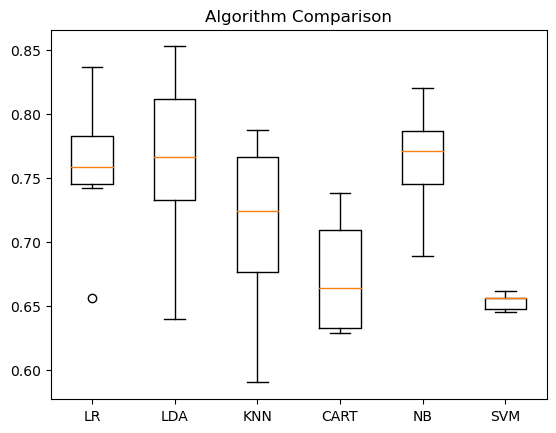

In [8]:
df = pd.read_csv("./data/diabetes.csv")
y = df['Outcome']
x = df.drop('Outcome', axis = 1)
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 3. How do the results compare? Was there an algorithm that consistently outperformed or underperformed?


LR, LDA, and NB all performed better than the rest. SVM is consistently worse than the rest of them, followed by CART.